In [10]:
import math
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Normalize usr_genre
def ugNorm(usr_genre):
    usr_genre_norm = np.zeros(usr_genre.shape)
    for i in range(len(usr_genre)):
        usr_genre_norm[i] = usr_genre[i]/np.max(usr_genre[i])
    print(usr_genre_norm.shape)
    return usr_genre_norm

def train_test_split(usr_following):
    #The number of following movie for each user
    each_user = np.sum(usr_following, axis=1)
    # print(each_user)

    print('Min number of followings:', np.min(each_user))
    print('Max number of followings:', np.max(each_user))
    print('Avg of followers:', np.mean(each_user))
    
    '''
    asc = np.sort(each_user)
    # print(each_user)
    # print(asc)
    desc = np.flip(asc)
    # print(desc)
    
    print('Over 10:', np.sum(each_user >= 10))
    print('Over 12:', np.sum(each_user >= 12))
    print('Over 14:', np.sum(each_user >= 14))
    print('Over 16:', np.sum(each_user >= 16))
    print('Over 18:', np.sum(each_user >= 18))
    print('Over 20:', np.sum(each_user >= 20))
    '''
    
    usr_idx = [i for i in range(len(usr_following))]
    print(len(usr_idx))

    random.seed(42)
    test_idx = sorted(random.sample(usr_idx, usr_test_amount))
    print(len(test_idx), test_idx[:10]) # 150 [13, 51, 54, 61, 65, 88, 93, 96, 114, 130]

    # init
    train_t = []
    train_f = []
    test_t = []
    test_f = []

    for i in range(usr_nb):
        # init
        t_for_train = []
        f_for_train = []
        t_for_test = []
        f_for_test = []

        if i not in test_idx: #if not in test id, just append it to true or false list
            for j in range(movie_nb):
                if usr_following[i][j] == 1:
                    t_for_train.append(j)
                else:
                    f_for_train.append(j)

            train_t.append(t_for_train)
            train_f.append(f_for_train)
    #         print(len(t_for_train) + len(f_for_train))

        else: #if in test id, choose half of true and other 
            temp_t = []
            temp_f = []

            for j in range(movie_nb):
                if usr_following[i][j] == 1:
                    temp_t.append(j)
                else:
                    temp_f.append(j)

            # random choose half true and half false for test 
            t_for_test = random.sample(temp_t, math.ceil(0.5*len(temp_t)))
            f_for_test  = random.sample(temp_f, movie_test_amount-len(t_for_test))

            test_t.append(t_for_test)
            test_f.append(f_for_test)

            #the others for training
            t_for_train = [item for item in temp_t if not item in t_for_test]
            f_for_train = [item for item in temp_f if not item in f_for_test]
            train_t.append(t_for_train)
            train_f.append(f_for_train)

        if not (len(t_for_train) + len(f_for_train) + len(t_for_test) + len(f_for_test)) == movie_nb:
            print('Error!!!')
            break
    
    return test_idx, train_t, train_f, test_t, test_f

In [3]:
# Basic setup
usr_following = np.load('./npy/user_followings.npy')
usr_genre = np.load('./npy/user_genre.npy')
movie_genre = np.load('./npy/movie_genre.npy')

print('Movie genre:', movie_genre.shape)
print('User following:', usr_following.shape)
print('User genre:', usr_genre.shape)

usr_nb = len(usr_following) # the number of users
movie_nb = len(movie_genre)  # the number of movies
print(usr_nb, movie_nb)

usr_test_amount = 150
movie_test_amount = 32
print(usr_test_amount, movie_test_amount)

usr_genre_norm = ugNorm(usr_genre)
test_idx, train_t, train_f, test_t, test_f = train_test_split(usr_following)

# Stat
#average num of following for training user
total_train = 0
for t in train_t:
    total_train += len(t)
avg = total_train / usr_nb
print('Training:', avg)

#average num of following for testing user
total_test = 0
for t in test_t:
    total_test += len(t)
avg = total_test / usr_test_amount
print('Testing:', avg)

all_auxilary = [i for i in range(movie_nb)]

Movie genre: (165, 20)
User following: (1582, 165)
User genre: (1582, 20)
1582 165
150 32
(1582, 20)
Min number of followings: 10
Max number of followings: 133
Avg of followers: 14.820480404551201
1582
150 [13, 51, 54, 61, 65, 88, 93, 96, 114, 130]
Training: 14.139064475347661
Testing: 7.1866666666666665


In [4]:
V = np.load('./npy/all_2372.npy')
print(V.shape)

matrixs = np.load('./weight/grid/MRM_E240_33.npz')
U = matrixs['U']
Y = matrixs['Y']
A = matrixs['A']
E = matrixs['E']
Wu = matrixs['Wu']
Wy = matrixs['Wy']
Wa = matrixs['Wa']
Wv = matrixs['Wv']
B = matrixs['B']

print('User latent shape: ',U.shape)
print('photo latent shape: ', Y.shape)
print('Auxilary latent shape: ',A.shape)
print('Embedding shape:', E.shape)
print('Wu weight shape:', Wu.shape)
print('Wy weight shape:', Wy.shape)
print('Wa weight shape:', Wa.shape)
print('Wv weight shape:', Wv.shape)
print('Beta shape:',B.shape)

(165, 2372)
User latent shape:  (1582, 64)
photo latent shape:  (165, 64)
Auxilary latent shape:  (165, 64)
Embedding shape: (240, 2372)
Wu weight shape: (1582, 165, 64)
Wy weight shape: (1582, 165, 64)
Wa weight shape: (1582, 165, 64)
Wv weight shape: (1582, 165, 240)
Beta shape: (1582, 240)


In [21]:
with open('../orderedListMovies.json', 'r') as openfile: 
    movie_ls = json.load(openfile)
print(len(movie_ls), movie_ls[:10])

with open('../orderedListGenres.json', 'r') as openfile: 
    genre_ls = json.load(openfile)
print(len(genre_ls), genre_ls[:10])

165 ['21bridgesmovie', '47metersdown', 'abeautifuldaymovie', 'abominablemovie', 'adastramovie', 'adogsjourneymovie', 'aftermathmovie', 'aftermovie', 'ahiddenlifefilm', 'alitamovie']
20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy']


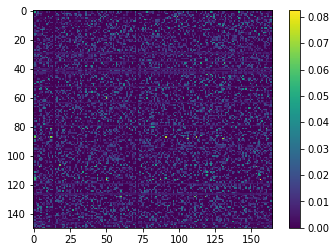

In [8]:
final_map = np.zeros(shape=(usr_test_amount,movie_nb))
map_id = 0

for idu in test_idx:
    alpha = np.dot(Wu[idu],U[idu].T)
    added_alpha = np.add(np.maximum(alpha, 0),0.0000000001)
    #print(added_alpha/np.sum(added_alpha))
    positive_alpha = []
    positive_yts = []
    for i in range(movie_nb):
        r =np.max(movie_genre[i]*usr_genre_norm[idu])
        positive_alpha.append(r*added_alpha[i])
        positive_yts.append(movie_ls[i])
    #print(positive_alpha)
    norm_alpha = positive_alpha/np.sum(positive_alpha)
    final_map[map_id] = norm_alpha
    map_id+=1
    
plt.imshow(final_map)
plt.colorbar()
plt.show()

In [17]:
final_map.shape

(150, 165)

In [23]:
df = pd.DataFrame(final_map, columns = movie_ls, index = test_idx).T
df.to_csv('./csv/user2movie.csv')
df

,13,51,54,61,65,88,93,96,114,130,...,1494,1508,1516,1518,1525,1529,1547,1554,1563,1573
21bridgesmovie,4.939380e-07,2.138286e-03,4.138210e-07,7.449208e-03,4.378218e-07,0.015114,0.000137,9.236049e-03,5.788043e-03,1.378079e-02,...,7.292339e-08,0.000013,5.761509e-07,1.600771e-02,0.018239,1.535126e-07,0.010547,2.772905e-02,0.001534,7.901607e-07
47metersdown,2.123361e-03,5.010506e-02,4.904752e-03,2.278783e-07,1.272232e-02,0.001840,0.000137,5.567090e-07,7.830662e-03,6.498677e-03,...,1.276159e-07,0.000013,1.275811e-02,1.212116e-06,0.018550,3.070253e-07,0.011637,1.676716e-02,0.019676,7.901607e-07
abeautifuldaymovie,1.155552e-02,7.941878e-08,1.280472e-02,1.899378e-02,0.000000e+00,0.001840,0.000486,7.797837e-03,1.049921e-07,3.190133e-08,...,1.823085e-08,0.004164,5.761509e-07,1.179474e-02,0.000520,1.360352e-02,0.005111,2.555195e-02,0.000341,1.520526e-02
abominablemovie,3.704535e-07,1.903203e-02,2.114230e-02,7.065797e-03,3.730045e-04,0.000613,0.006812,1.790320e-02,1.049921e-07,7.761014e-04,...,1.276159e-07,0.019329,2.880755e-06,9.882300e-03,0.001276,1.004797e-02,0.006912,1.276901e-03,0.018025,4.254711e-07
adastramovie,7.490455e-03,3.176751e-07,8.845829e-03,2.278783e-07,6.567326e-07,0.001840,0.005150,5.567090e-07,1.049921e-07,9.517988e-03,...,1.276159e-07,0.000013,1.773729e-02,9.146282e-03,0.001489,3.012127e-02,0.005111,1.735706e-07,0.019161,1.192503e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wrinklestheclown,3.516482e-03,5.559314e-07,1.410648e-02,9.766213e-08,1.308920e-03,0.000767,0.010168,2.298031e-02,1.399894e-07,4.696407e-03,...,8.603399e-03,0.003180,4.609207e-06,7.923394e-03,0.012779,3.070253e-07,0.007445,8.871799e-04,0.001704,1.320194e-02
xmenmovies,5.948693e-03,3.722657e-03,9.215132e-03,1.121493e-02,2.383477e-02,0.000460,0.004682,6.958863e-08,1.923054e-02,2.233093e-07,...,1.276159e-07,0.006284,6.340196e-03,1.454539e-06,0.014363,1.400625e-03,0.006775,3.471413e-08,0.017485,0.000000e+00
yardiefilm,1.152079e-03,5.997204e-03,4.138210e-07,2.278783e-07,0.000000e+00,0.001840,0.018654,1.346835e-02,2.894676e-02,6.281947e-03,...,3.398728e-03,0.017344,5.761509e-07,8.450326e-03,0.000425,8.796918e-03,0.005111,8.598549e-03,0.004882,1.270910e-02
yesterdaymovie,1.424053e-02,9.946476e-04,1.640872e-03,9.766213e-08,2.698890e-02,0.005072,0.041509,2.394717e-02,7.280828e-03,9.570400e-08,...,1.084482e-02,0.000019,2.880755e-06,7.272694e-07,0.003529,8.697766e-03,0.004365,3.471413e-08,0.008786,1.248072e-02


In [19]:
np.dot(final_map, movie_genre).shape

(150, 20)

In [24]:
df = pd.DataFrame(np.dot(final_map, movie_genre), columns = genre_ls, index = test_idx).T
df.to_csv('./csv/user2genre.csv')
df

,13,51,54,61,65,88,93,96,114,130,...,1494,1508,1516,1518,1525,1529,1547,1554,1563,1573
Action,0.170498,2.162467e-01,1.726452e-01,1.886217e-01,3.794365e-01,0.134207,0.163306,0.167890,2.639074e-01,0.515750,...,0.446515,0.160393,1.557530e-01,0.305414,0.378190,2.418096e-01,0.187818,0.112139,0.334477,9.068138e-02
Adventure,0.211101,3.471960e-01,3.094401e-01,1.933848e-01,2.690135e-01,0.165013,0.215560,0.262626,2.266396e-01,0.464398,...,0.528753,0.344688,2.783756e-01,0.341840,0.405781,4.108072e-01,0.237068,0.111459,0.370704,2.178007e-01
Animation,0.041258,1.206936e-01,1.471007e-01,6.432696e-02,6.430495e-02,0.066331,0.074763,0.140963,8.131661e-02,0.136043,...,0.069228,0.201534,8.857843e-02,0.115541,0.099323,9.108182e-02,0.087182,0.051595,0.097364,1.206303e-01
Biography,0.156443,5.405919e-02,1.077501e-01,1.954952e-01,7.779657e-02,0.145316,0.121946,0.126363,9.081617e-02,0.045593,...,0.070059,0.114881,5.412884e-02,0.125091,0.060834,6.211028e-02,0.172514,0.133762,0.042636,8.213225e-02
Comedy,0.265629,2.850198e-01,3.914374e-01,2.874321e-01,3.487629e-01,0.270080,0.585007,0.431502,3.013345e-01,0.439005,...,0.378244,0.495700,3.987123e-01,0.350215,0.304566,3.564735e-01,0.305168,0.290165,0.366295,4.528009e-01
Crime,0.096024,1.244746e-01,8.627052e-02,1.348890e-01,1.161397e-01,0.148075,0.195477,0.130989,1.414883e-01,0.112991,...,0.144280,0.180147,7.194809e-02,0.185440,0.152486,9.969359e-02,0.135783,0.266625,0.133910,9.396687e-02
Documentary,0.003516,5.559314e-07,1.410648e-02,9.766213e-08,1.308920e-03,0.000767,0.010168,0.022980,1.749868e-07,0.004696,...,0.008603,0.007377,4.609207e-06,0.007923,0.012779,3.070253e-07,0.007445,0.006421,0.001704,1.320200e-02
Drama,0.604142,5.289170e-01,6.864438e-01,7.834719e-01,2.200192e-01,0.807576,0.584568,0.675223,4.962818e-01,0.312286,...,0.378031,0.578854,4.468739e-01,0.617204,0.434616,4.308550e-01,0.696581,0.910718,0.428720,7.474350e-01
Family,0.016007,4.278804e-02,6.875003e-02,7.935668e-03,6.720924e-02,0.005633,0.034786,0.006702,4.512799e-02,0.045469,...,0.068509,0.007704,3.374318e-02,0.020581,0.047702,6.209072e-02,0.022773,0.003710,0.046532,4.813122e-03
Fantasy,0.085478,7.878715e-02,7.213426e-02,5.572764e-02,1.138430e-01,0.083605,0.147597,0.067903,7.447020e-02,0.050716,...,0.149914,0.056718,1.213313e-01,0.084537,0.111812,1.299348e-01,0.057062,0.055399,0.098752,4.575324e-02


In [111]:
# final_map = np.dot(final_map, movie_genre)

In [107]:
Horror = [51, 859, 939, 1182, 1221, 1285, 1287]
Horror_m = [1, 44, 46, 50, 78, 99, 112, 141, 156] #Horror
Action = [163, 255, 407, 1195, 1300, 1385, 1437]
Action_m = [10, 30, 57, 105, 129, 131, 135, 152] #Action

In [116]:
# x for user, y for movie
selected_idx = [test_idx.index(i) for i in (Horror+Action)]
selected_idy = [0, 1, 4, 11, 13, 17]#(Horror_m + Action_m)

selected_map = np.zeros(shape=(len(selected_idx),len(selected_idy)))
for i in range(len(selected_idx)):
    for j in range(len(selected_idy)):
        selected_map[i][j]= final_map[selected_idx[i]][selected_idy[j]]

In [117]:
axis_ytList = []
for youtuber_idy in selected_idy:
    #print(ytList[youtuber_idy],list(YouTuber_category[youtuber_idy]).index(np.max(YouTuber_category[youtuber_idy])))
#     axis_ytList.append(movie_ls[youtuber_idy])
    axis_ytList.append(genre_ls[youtuber_idy])

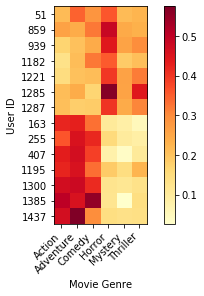

In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#plt.xlim([0,8])  # x軸邊界
#plt.ylim([0,6])  # y軸邊界
plt.xticks(np.arange(len(axis_ytList)),axis_ytList,rotation=45, ha='right')
plt.yticks(np.arange(0,len(selected_idx)),[str(val) for val in (Horror+Action)])
plt.imshow(selected_map, cmap='YlOrRd')
#plt.yticks(np.arange(-1, 7, step=1))
plt.xlabel('Movie Genre')
plt.ylabel('User ID')
#plt.title('Examples of attention')
plt.colorbar()
plt.show()